In [63]:
import pandas as pd
import numpy as np

# Loading Data Set 

In [66]:
#This is the data set given by the Edunet Foundation

data = pd.read_excel('EBP.xlsx')

# Data Overview

In [67]:
#Gives the number of rows and columns in the data set

data.shape


(22750, 9)

In [68]:
#

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [69]:
#Gives the statistical information about the data set

data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [70]:
#Checking the number of distinct values in a particular column

data.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [71]:
#Finding the number of null values in a particular column

data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [72]:
# Removing the Employee ID Column as it contributes nothing to the burnout

data = data.drop('Employee ID', axis = 1)

In [73]:
#Remaining Columns

data.columns.tolist()

['Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

# Exploratory Data Analysis

In [74]:
import seaborn as sns

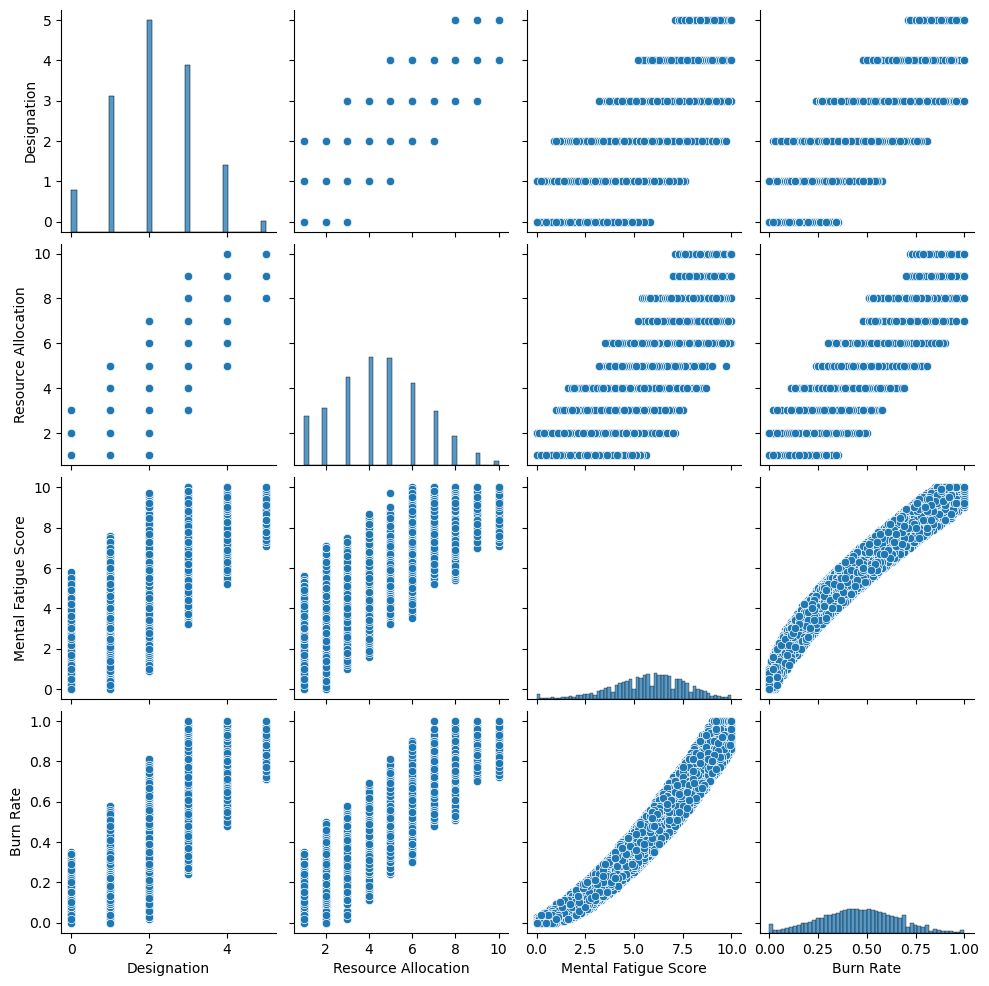

In [75]:
sns.pairplot(data)

In [76]:
data.corr(numeric_only=True)['Burn Rate'][:-1]


Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Name: Burn Rate, dtype: float64

In [114]:
#Removed all null value rows

data = data.dropna()

In [115]:
data.shape

(18590, 7)

In [78]:
data.isnull().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [79]:
data.shape

(18590, 8)

In [80]:
data.corr(numeric_only=True)['Burn Rate'][:-1]


Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Name: Burn Rate, dtype: float64

/var/folders/8k/mf63dq1s2hnf3ntmsfnx8s340000gp/T/ipykernel_814/1310456964.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


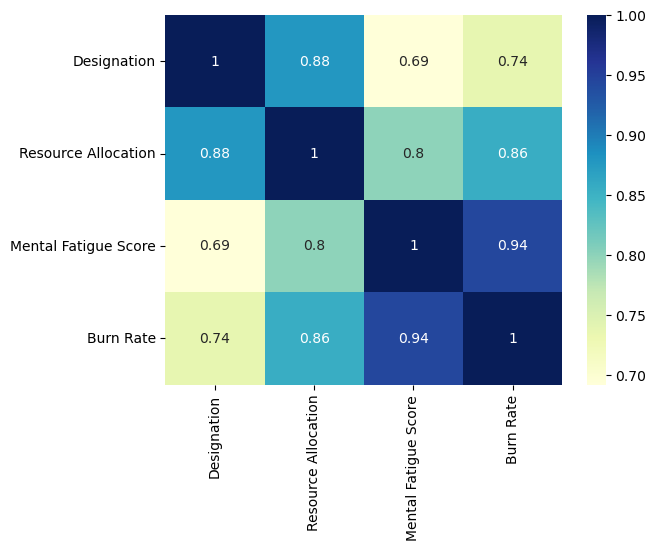

In [81]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 


In [82]:
data.dtypes

Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [83]:
data_2008 = pd.to_datetime(["2008-01-01"]*len(data))
data["Days"] = data['Date of Joining'].astype("datetime64").sub(data_2008).dt.days
data.Days

/var/folders/8k/mf63dq1s2hnf3ntmsfnx8s340000gp/T/ipykernel_814/2561684650.py:2: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  data["Days"] = data['Date of Joining'].astype("datetime64").sub(data_2008).dt.days
/var/folders/8k/mf63dq1s2hnf3ntmsfnx8s340000gp/T/ipykernel_814/2561684650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Days"] = data['Date of Joining'].astype("datetime64").sub(data_2008).dt.days


0        273
1        334
3        307
4        205
5        330
        ... 
22743    349
22744    147
22746     18
22748      9
22749      5
Name: Days, Length: 18590, dtype: int64

# Correlation

In [84]:
data['Gender'] = data['Gender'].replace({'Female': 0, 'Male': 1})
data['Company Type'] = data['Company Type'].replace({'Product': 0, 'Service': 1})
data['WFH Setup Available'] = data['WFH Setup Available'].replace({'No': 0, 'Yes': 1})

/var/folders/8k/mf63dq1s2hnf3ntmsfnx8s340000gp/T/ipykernel_814/437639099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = data['Gender'].replace({'Female': 0, 'Male': 1})
/var/folders/8k/mf63dq1s2hnf3ntmsfnx8s340000gp/T/ipykernel_814/437639099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Company Type'] = data['Company Type'].replace({'Product': 0, 'Service': 1})
/var/folders/8k/mf63dq1s2hnf3ntmsfnx8s340000gp/T/ipykernel_814/437639099.py:3: SettingWithCopyWarning: 
A value is

In [85]:
data.corr(numeric_only=True)['Burn Rate'][:]

Gender                  0.156577
Company Type            0.005904
WFH Setup Available    -0.307168
Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64

In [86]:
data = data.drop(['Date of Joining','Days'], axis = 1)

In [87]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,1,0,2,3.0,3.8,0.16
1,1,1,1,1,2.0,5.0,0.36
3,1,1,1,1,1.0,2.6,0.20
4,0,1,0,3,7.0,6.9,0.52
5,1,0,1,2,4.0,3.6,0.29


In [88]:
import matplotlib.pyplot as plt

In [89]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,1,0,2,3.0,3.8,0.16
1,1,1,1,1,2.0,5.0,0.36
3,1,1,1,1,1.0,2.6,0.20
4,0,1,0,3,7.0,6.9,0.52
5,1,0,1,2,4.0,3.6,0.29


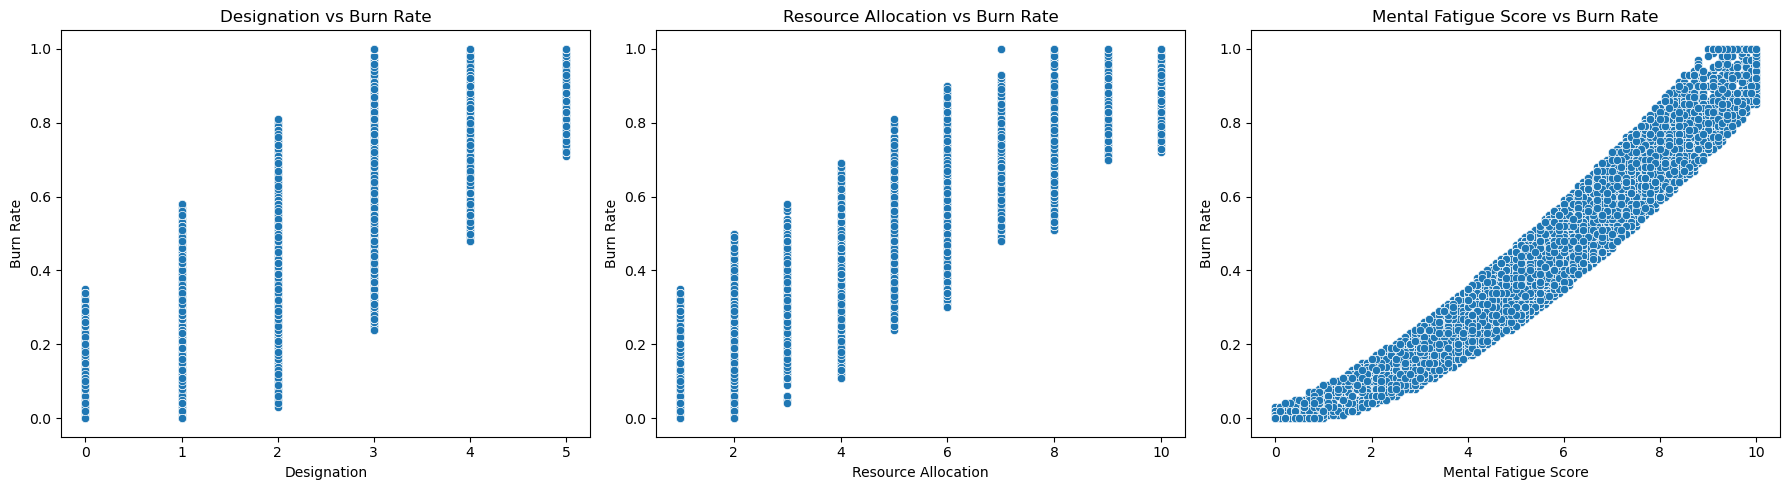

In [90]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Designation', y='Burn Rate', data=data)
plt.title('Designation vs Burn Rate')
plt.xlabel('Designation')
plt.ylabel('Burn Rate')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Resource Allocation', y='Burn Rate', data=data)
plt.title('Resource Allocation vs Burn Rate')
plt.xlabel('Resource Allocation')
plt.ylabel('Burn Rate')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Mental Fatigue Score', y='Burn Rate', data=data)
plt.title('Mental Fatigue Score vs Burn Rate')
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Burn Rate')
plt.tight_layout()
plt.show()

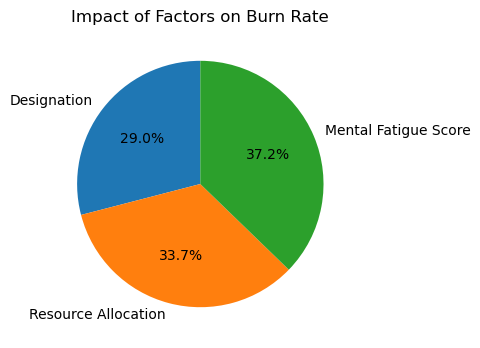

In [91]:
correlations = data[['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']].corr()['Burn Rate'][:-1]
labels = correlations.index
sizes  = abs(correlations.values)
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Impact of Factors on Burn Rate')
plt.show()


# Feature Selection

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [93]:
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [95]:
X_train

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
19281,0,1,0,3,8.0,7.7
12801,1,1,1,4,7.0,6.5
9683,1,1,0,2,5.0,7.6
9453,0,1,1,2,5.0,4.7
8440,1,1,0,2,4.0,7.8
...,...,...,...,...,...,...
13864,0,1,0,3,5.0,5.2
14685,0,1,1,1,2.0,4.3
6570,1,0,0,1,2.0,4.9
1058,0,0,1,1,3.0,5.1


# Model Building

## Linear Regression

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [97]:

lm = LinearRegression()

lm.fit(X_train, y_train)


LinearRegression()

In [98]:
prediction = lm.predict(X_test)
print('Linear Regression: ')
r2_score(y_test, prediction)


Linear Regression: 


0.9206064766804504

In [99]:
# The coefficients in a dataframe

cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

                          Coef
Gender                0.004493
Company Type          0.000381
WFH Setup Available  -0.011802
Designation          -0.004425
Resource Allocation   0.028301
Mental Fatigue Score  0.074054


## Decision Tree Regressor

In [100]:
from sklearn.tree import DecisionTreeRegressor

In [101]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [102]:
prediction = dt.predict(X_test)
print('Decision Tree Regressor: \n')
r2_score(y_test, prediction)

Decision Tree Regressor: 



0.8994161652921103

## Random Forest Generator

In [103]:
from sklearn.ensemble import RandomForestRegressor


In [104]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [105]:
prediction = rfr.predict(X_test)
print('Random Forest Generator: ')
r2_score(y_test, prediction)

Random Forest Generator: 


0.911454761779549

# Predictions

Predicting Test Data
Now that the model is trained, we should be able to use it to make our predictions and evaluate our model. The scatter plot below plots the actual y values to the model's predictions. The model seems to behave accurately.

In [106]:
predictions = lm.predict(X_test)

In [107]:
predictions

array([0.2487785 , 0.39722604, 0.36017071, ..., 0.35075234, 0.7471699 ,
       0.33629456])

# Analytical Evaluation

In [108]:
predictions = lm.predict(X_test)

#calculate mean squared error
mse = mean_squared_error(y_test, predictions)

#calculate root mean square error
rmse = np.sqrt(mse)

#calculate mean absolute error
mae = mean_absolute_error(y_test, predictions)

#calculate R-squared error
r2 = r2_score(y_test, predictions)


print('Linear Regression Model Performance Matrix:\n')

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

Linear Regression Model Performance Matrix:

Mean Squared Error: 0.00307175827222097
Root Mean Squared Error: 0.05542344514933162
Mean Absolute Error: 0.04552119438270917
R-squared: 0.9206064766804504


# Result Graph

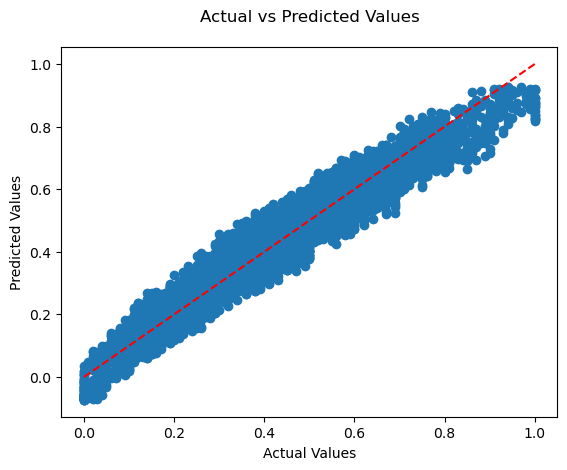

In [109]:
plt.scatter(x=y_test,y=predictions)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'r',linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values\n')
plt.show()

# Residuals

In [110]:
residuals = y_test - predictions

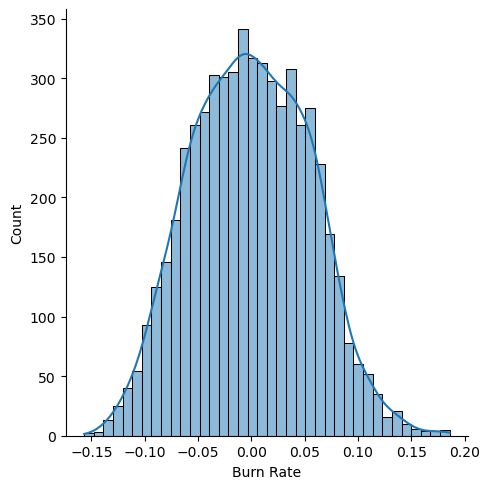

In [111]:
sns.displot(residuals, kde=True)

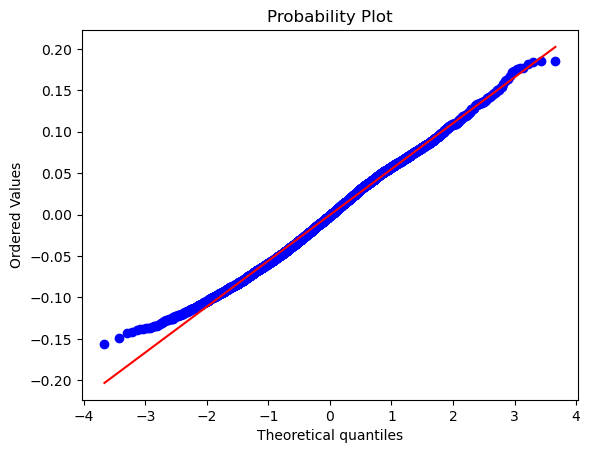

In [112]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

Text(0.5, 1.0, 'Evaluation of our Linear Regression Model\n')

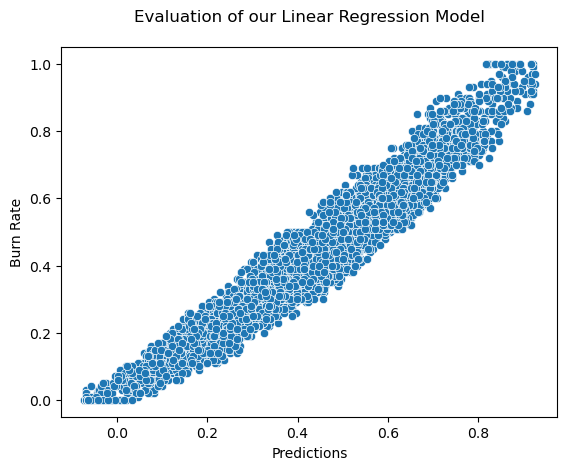

In [113]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of our Linear Regression Model\n")